# Notes:

You are banned from using loops (`for` or `while` or any other) for this entire workshop!

You shouldn't be using loops almost ever with pandas in any case, so break out of the habit now.

## 1. DataFrame basics


Consider the following Python dictionary `data` and Python list `labels`:

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```
(This is just some meaningless data I made up with the theme of animals and trips to a vet.)

**1.** Create a DataFrame `df` from this dictionary `data` which has the index `labels`.

**2.** Select only the rows where visits are 3 or more. Which types of animals are these?

**3.** Select the rows where visists are 3 and the animal is a cat

**4.** Calculate the sum of all visits in `df` (i.e. the total number of visits).

**5.** Calculate the mean age for each different animal in `df`.

**6.** Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.



In [2]:
import numpy as np
import pandas as pd
#1.1) Create a DataFrame df from this dictionary data which has the index labels

data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

df = pd.DataFrame(data, index=labels)
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


In [251]:
#1.2) Select only the rows where visits are 3 or more. Which types of animals are these?
df3visit = df[(df.visits >= 3)]
df3visit
# two cats and one dog

,animal,age,visits,priority
b,cat,3.0,3,yes
d,dog,NaN,3,yes
f,cat,2.0,3,no


In [252]:
#1.3) Select the rows where visists are 3 and the animal is a cat

df2 = df[(df.visits >= 3)  & (df.animal == 'cat')]
df2

,animal,age,visits,priority
b,cat,3.0,3,yes
f,cat,2.0,3,no


In [253]:
#1.4) Calculate the sum of all visits in df (i.e. the total number of visits).

df.visits.sum()

19

In [254]:
#1.5) Calculate the mean age for each different animal in df.

mean_age = df.groupby('animal')['age'].mean()
mean_age

animal
cat      2.5
dog      5.0
snake    2.5
Name: age, dtype: float64

In [255]:
#1.6) Append a new row 'k' to df with your choice of values for each column. Then delete that row to return the original DataFrame.

k = {
    'animal':['human'],
    'age': [23],
    'visits': [2],
    'priority': ['yes']
}

df = df.append(pd.DataFrame(k, index=['k']))
df = df.drop(['k'])
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


# 2.1 Shifty problem

You have a DataFrame `df` with a column 'A' of integers. For example:
```python
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
```

How do you filter out rows which contain the same integer as the row immediately above?

You should be left with a column containing the following values:

```python
1, 2, 3, 4, 5, 6, 7
```

### Hint: use the `shift()` method

In [256]:
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
df2 = pd.DataFrame({'A': list(set(df.A.to_list()))})
df2

,A
0,1
1,2
2,3
3,4
4,5
5,6
6,7


# 2.2 columns sum min

Suppose you have DataFrame with 10 columns of real numbers, for example:

```python
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
```
Which column of numbers has the smallest sum? Return that column's label.

In [257]:
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))

x = df.sum()
x.idxmin()

'e'

# 2.3 Duplicates

How do you count how many unique rows a DataFrame has (i.e. ignore all rows that are duplicates)?

**hint:** There's a method for to find duplicate rows for you

- Use df.duplicated to return boolean series for each duplicated rows
    - Then sum boolean series as False = 0 and True = 1 so the sum would be the number of duplicate rows

# 2.4 Group Values

A DataFrame has a column of groups 'grps' and and column of integer values 'vals': 

```python
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
```
For each *group*, find the sum of the three greatest values.  You should end up with the answer as follows:
```
grps
a    409
b    156
c    345
```

In [258]:
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
df = df.sort_values(['grps', 'vals'], ascending=(True,False))

x = df.groupby('grps').head(3).groupby(['grps']).sum()
x

,vals
grps,
a,409
b,156
c,345


# 3. Cleaning Data

### Making a DataFrame easier to work with

It happens all the time: someone gives you data containing malformed strings, Python, lists and missing data. How do you tidy it up so you can get on with the analysis?

Take this monstrosity as the DataFrame to use in the following puzzles:

```python
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})
```

Formatted, it looks like this:

```
            From_To  FlightNumber  RecentDelays              Airline
0      LoNDon_paris       10045.0      [23, 47]               KLM(!)
1      MAdrid_miLAN           NaN            []    <Air France> (12)
2  londON_StockhOlm       10065.0  [24, 43, 87]  (British Airways. )
3    Budapest_PaRis           NaN          [13]       12. Air France
4   Brussels_londOn       10085.0      [67, 32]          "Swiss Air"
```

**1.** Some values in the the **FlightNumber** column are missing (they are `NaN`). These numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put in place. Modify `df` to fill in these missing numbers and make the column an integer column (instead of a float column).

In [259]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})

df.FlightNumber.loc[1] = df.FlightNumber.loc[1-1] + 10
df.FlightNumber.loc[3] = df.FlightNumber.loc[3-1] + 10
df.FlightNumber = df.FlightNumber.astype(int)
df


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055,[],<Air France> (12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075,[13],12. Air France
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air"""


# 3.2 column splitting

The **From\_To** column would be better as two separate columns! Split each string on the underscore delimiter `_` to make two new columns `From` and `To` to your dataframe.

In [260]:
df[['From','To']] = df['From_To'].str.split('_',expand=True)
df

,From_To,FlightNumber,RecentDelays,Airline,From,To
0,LoNDon_paris,10045,"[23, 47]",KLM(!),LoNDon,paris
1,MAdrid_miLAN,10055,[],<Air France> (12),MAdrid,miLAN
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. ),londON,StockhOlm
3,Budapest_PaRis,10075,[13],12. Air France,Budapest,PaRis
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air""",Brussels,londOn


# 3.3 Clean Text

Make the text in your dataframe:

- From and To columns should be lowercase with only first letter capitalized

- In the **Airline** column, you can see some extra puctuation and symbols have appeared around the airline names. Pull out just the airline name. E.g. `'(British Airways. )'` should become `'British Airways'`.

In [271]:
df = df.drop(["From_To"], axis=1)
df['From'] = df['From'].str.title()
df['To'] = df['To'].str.title()
df["Airline"] = df['Airline'].str.replace('[^\w\s]','')
df['Airline'] = df['Airline'].str.replace('\d+', '')
df

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM,London,Paris
1,10055,[],Air France,Madrid,Milan
2,10065,"[24, 43, 87]",British Airways,London,Stockholm
3,10075,[13],Air France,Budapest,Paris
4,10085,"[67, 32]",Swiss Air,Brussels,London


# Exercise 4.1: Column Splitting

Given the unemployment data in `data/country_total.csv`, split the `month` column into two new columns: a `year` column and a `month` column, both integers

In [345]:
df = pd.read_csv('data/country_total.csv')
df['month'] = df['month'].astype(str)
df[['year','month']] = df['month'].str.split('.', expand=True)
df['month'] = df['month'].astype(int)
df['year'] = df['year'].astype(int)
#df["month"] = df['month'].str.replace('1','10')

df.head(12)

,country,seasonality,month,unemployment,unemployment_rate,year
0,at,nsa,1,171000,4.5,1993
1,at,nsa,2,175000,4.6,1993
2,at,nsa,3,166000,4.4,1993
3,at,nsa,4,157000,4.1,1993
4,at,nsa,5,147000,3.9,1993
5,at,nsa,6,134000,3.5,1993
6,at,nsa,7,128000,3.4,1993
7,at,nsa,8,130000,3.4,1993
8,at,nsa,9,132000,3.5,1993
9,at,nsa,1,141000,3.7,1993


# 4.2 Group Statistics

Given the unemployment data in `data/country_sex_age.csv`, give the average unemployment rate for:

- Each gender
- Each Age Group
- Both Together

**HINT:** The `seasonality` column makes it such that the data is repeated for each method of calculating unemployment (`nsa`, `trend`, etc.). Can you ignore this and group over it? Or should you take the average for each?

In [2]:
import pandas as pd

df3 = pd.read_csv("data/country_sex_age.csv")
df3_nsa = df3[df3.seasonality == 'nsa']
gender_mean = df3_nsa.groupby('sex')['unemployment'].mean()
age_group_mean = df3_nsa.groupby('age_group')['unemployment'].mean()
both_together_mean = df3_nsa.groupby(['age_group', 'sex'])['unemployment'].mean()
print(gender_mean)
print(age_group_mean)
print(both_together_mean)

sex
f    177911.876554
m    194571.376335
Name: unemployment, dtype: float64
age_group
y25-74    255862.951587
y_lt25    116620.301302
Name: unemployment, dtype: float64
age_group  sex
y25-74     f      244200.087758
           m      267525.815416
y_lt25     f      111623.665350
           m      121616.937253
Name: unemployment, dtype: float64


In [36]:
df3_sa = df3[df3.seasonality == 'sa']
gender_mean2 = df3_sa.groupby('sex')['unemployment'].mean()
age_group_mean2 = df3_sa.groupby('age_group')['unemployment'].mean()
both_together_mean2 = df3_sa.groupby(['age_group', 'sex'])['unemployment'].mean()
print(gender_mean2)
print(age_group_mean2)
print(both_together_mean2)

sex
f    194685.050591
m    214001.496366
Name: unemployment, dtype: float64
age_group
y25-74    288742.482542
y_lt25    119944.064415
Name: unemployment, dtype: float64
age_group  sex
y25-74     f      275348.154482
           m      302136.810603
y_lt25     f      114021.946701
           m      125866.182129
Name: unemployment, dtype: float64


In [37]:
df3_trend = df3[df3.seasonality == 'trend']
gender_mean3 = df3_trend.groupby('sex')['unemployment'].mean()
age_group_mean3 = df3_trend.groupby('age_group')['unemployment'].mean()
both_together_mean3 = df3_trend.groupby(['age_group', 'sex'])['unemployment'].mean()
print(gender_mean3)
print(age_group_mean3)
print(both_together_mean3)

sex
f    191593.353518
m    211275.951557
Name: unemployment, dtype: float64
age_group
y25-74    284179.858708
y_lt25    118689.446367
Name: unemployment, dtype: float64
age_group  sex
y25-74     f      270308.535179
           m      298051.182238
y_lt25     f      112878.171857
           m      124500.720877
Name: unemployment, dtype: float64


- Looking at the averages for each seasonality, it can be seen that the results for 'sa' and 'trend' are very similar to each other and differs a bit from the 'nsa' seasonality

# 4.3 Estimating group size

Given that we have the unemployment **rate** as a % of total population, and the number of total unemployed, we can estimate the total population.

Give an estimate of the total population for men and women in each age group.

Does this change depending on the unemployment seasonality calculation method?

In [338]:
df3 = pd.read_csv("data/country_sex_age.csv")
df3['pop_estimate'] = df3['unemployment'] / (df3['unemployment_rate']/100)
df3['month'] = df3['month'].astype(str)
df3[['year','month']] = df3['month'].str.split('.', expand=True)
df3_2010 = df3[df3.year == '2010']

In [342]:
df3_2010.groupby(['sex', 'age_group', 'seasonality'])["pop_estimate"].sum()

sex  age_group  seasonality
f    y25-74     nsa            1.177831e+09
                sa             1.177295e+09
                trend          1.091795e+09
     y_lt25     nsa            1.511877e+08
                sa             1.502445e+08
                trend          1.440417e+08
m    y25-74     nsa            1.481535e+09
                sa             1.482767e+09
                trend          1.359119e+09
     y_lt25     nsa            1.886541e+08
                sa             1.886300e+08
                trend          1.792052e+08
Name: pop_estimate, dtype: float64

- Decided to calculate population totals for the latest year (2010) as that is the closest to recent time

- The totals for each age group among male and female can be seen above. It should be noted that the values of 'nsa' and 'sa' seasonality are much more similar to each other compared to 'trend'

# 5.1 Tennis

In `data/tennis.csv` you have games that Roger Federer played against various opponents. Questions:

1. How many games did Federer win?

2. What is Federer's win/loss ratio?

3. Who were Federer's top 5 opponents?

In [355]:
#5.1.1 and 5.1.2)
import numpy as np

df_tennis = pd.read_csv('data/tennis.csv')
win = df_tennis['win'].to_numpy()

print(str(np.sum(win)) + ' is the number of games Federer won')
print(str(np.sum(win)/len(win) * 100) + "% is Federer's win/loss ratio")

972 is the number of games Federer won
82.44274809160305% is Federer's win/loss ratio


In [258]:
#5.1.3)
df_tennis['loss'] = (~(df_tennis['win']))
losses = df_tennis.groupby('opponent')['loss'].sum()
losses = pd.DataFrame(losses)
losses = losses.sort_values(by=['loss'], ascending=False)
losses.head(10)

,loss
opponent,
Rafael Nadal (ESP),18.0
Novak Djokovic (SRB),13.0
Andy Murray (GBR),10.0
Lleyton Hewitt (AUS),8.0
David Nalbandian (ARG),8.0
Tim Henman (GBR),6.0
Tomas Berdych (CZE),5.0
Juan Martin Del Potro (ARG),4.0
Jo-Wilfried Tsonga (FRA),4.0


- As it can be seen from the dataframe above, Federer's top 5 toughest opponents are Nadal, Djokovic, Murray, Hewitt and Nalbandian 

# 5.2 Over time

1. What was Federer's best year? In terms of money, and then in terms of number of wins

2. Did Federer get better or worse over time?

In [356]:
'''
- Remove all non-numeric characters from the prize money column
- Then convert tournament prize money column to int using pd.to_numeric
- Finally use groupby to calculate money earned per year
'''
df_tennis['tournament prize money'] = df_tennis['tournament prize money'].str.replace(' ', '')
df_tennis["tournament prize money"] = df_tennis['tournament prize money'].str.replace('[^\w]','')
df_tennis["tournament prize money"] = df_tennis['tournament prize money'].str.replace(r"[a-zA-Z]",'')
df_tennis['tournament prize money'] = df_tennis['tournament prize money'].apply(pd.to_numeric)

money_year = df_tennis.groupby('year')['tournament prize money'].sum()

In [262]:
money_year = pd.DataFrame(money_year)
print((money_year.idxmax(), money_year.max()))
print("2007 is the year Federer made the most money")

(tournament prize money    2007
dtype: int64, tournament prize money    55246570.0
dtype: float64)
2007 is the year Federer made the most money


In [263]:
win_year = df_tennis.groupby('year')['win'].sum()
win_year = pd.DataFrame(win_year)
print((win_year.idxmax(), win_year.max()))
print('2006 is the year he won the most times')

(win    2006
dtype: int64, win    96.0
dtype: float64)
2006 is the year he won the most times


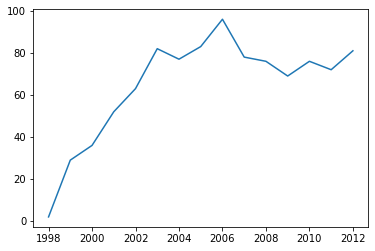

In [231]:
import matplotlib.pyplot as plt
plt.plot(win_year)

5.2.2)

- Decided to look at wins per year to measure performance over time as prize money earned per year can be affected by various factors not related to sporting ability (such as sponsorships). So looking at Federer's wins per year, it can be seen he gets better over time starting at 1998 and hits a peak in 2006. 

- Even after hitting his peak, he continues to perform at a high level (his 2002 - 2005 levels) even though he doesn't reach the number of wins he did in 2006.

# 5.3 Total money won

In the data, you'll find the `tournament round`, one value of which, `F` indicates the final.

Assuming Federer wins the money in the `tournament prize money` if he wins a final in a tournament, how much money has Federer made in tournaments in this dataset?

In [271]:
df_tournament_win = df_tennis[(df_tennis["tournament round"] == 'F') & (df_tennis["win"] == True)]

print(str(df_tournament_win['tournament prize money'].sum()) + " is Federer's earnings in tournaments he has won")

44934964.0 is Federer's earnings in tournaments he has won
